Basic Quantum entanglement , 
---
Review: we have the following 0ne-qubits:
$$|0>=
\begin{bmatrix}
1\\0\\
\end{bmatrix},
|1>=
\begin{bmatrix}
0\\1\\
\end{bmatrix}
$$
and the two-qubits could be made by kronecker product of two one-qubits as follows:
- kronnecker product:
$$\mathbf{a}\otimes\mathbf{b}
=(a_{ij})\otimes(b_{ij})
=\begin{bmatrix}
a_{11}\mathbf{b}&\cdots&a_{1n}\mathbf{b}\\
\vdots&\ddots&\vdots\\
a_{m1}\mathbf{b}&\cdots&a_{mn}\mathbf{b}\\
\end{bmatrix}
$$
- $|00>,|01>,|10>,|11>$:
$$
|00>=|0>\otimes|0>=
\begin{bmatrix}
1\\0\\
\end{bmatrix}
\otimes
\begin{bmatrix}
1\\0\\
\end{bmatrix}=
\begin{bmatrix}
1\times\begin{bmatrix}
1\\0\\
\end{bmatrix}\\0\times\begin{bmatrix}
1\\0\\
\end{bmatrix}\\
\end{bmatrix}
=\begin{bmatrix}
1\\0\\0\\0\\
\end{bmatrix},\\
|01>=|0>\otimes|1>==\begin{bmatrix}
0\\1\\0\\0\\
\end{bmatrix},|10>=|1>\otimes|0>==\begin{bmatrix}
0\\0\\1\\0\\
\end{bmatrix},|11>=|1>\otimes|1>==\begin{bmatrix}
0\\0\\0\\1\\
\end{bmatrix},
$$

1. CNOT gate, Controlled not gate, two inputs (one for control, and one for target), and two outputs
```
   inputs   ➡︎     outputs 
 |0>  |0>       |0>  |0>
 |0>  |1>       |0>  |1>
 |1>  |0>       |1>  |1>
 |1>  |1>       |1>  |0>
```

$$\text{CNOT, (LST as target) } =
\begin{array}{cccc}
      & \textbf{00} & \textbf{01} & \textbf{10} & \textbf{11} \\
      \textbf{00} & 1 & 0 & 0 & 0 \\
      \textbf{01} & 0 & 1 & 0 & 0 \\
      \textbf{10} & 0 & 0 & 0 & 1 \\
      \textbf{11} & 0 & 0 & 1 & 0 \\
    \end{array}
$$

$$\text{CNOT, (MST as target) } =
\begin{array}{cccc}
      & \textbf{00} & \textbf{01} & \textbf{10} & \textbf{11} \\
      \textbf{00} & 1 & 0 & 0 & 0 \\
      \textbf{01} & 0 & 0 & 0 & 1 \\
      \textbf{10} & 0 & 0 & 1 & 0 \\
      \textbf{11} & 0 & 1 & 0 & 0 \\
    \end{array}
$$

where `LSB`/MSB are `Least`/most significant bit, for instance: for $q_0-q_1$ circuit, $q_0$ is `LSB` and the other is `MSB`. 

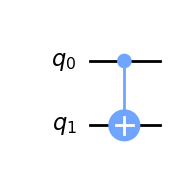

In [1]:
#Program 4.1 Apply CX-gate to qubit, MSB case
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')

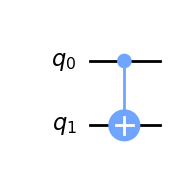

Total Assembly Time - 0.11182 (ms)
Total Assembly Time - 0.19383 (ms)
Total Assembly Time - 0.07224 (ms)
Total Assembly Time - 0.59223 (ms)
Total Assembly Time - 0.19813 (ms)
Total Assembly Time - 0.13113 (ms)
Total Assembly Time - 0.08321 (ms)
Total Assembly Time - 0.05484 (ms)
Total Assembly Time - 0.08488 (ms)
Total Assembly Time - 0.15116 (ms)
Total Assembly Time - 0.35501 (ms)
Total Assembly Time - 0.16093 (ms)


<IPython.core.display.Latex object>

In [2]:
#Program 4.2 Show unitary matrix of CX-gate (MSB as target bit)
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
qc = QuantumCircuit(2)
qc.cx(0,1)
display(qc.draw('mpl'))
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CNOT (MSB as target bit) = }"))

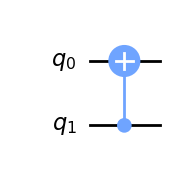

Total Assembly Time - 0.20409 (ms)


<IPython.core.display.Latex object>

In [3]:
#Program 4.3 Show unitary matrix of CX-gate (LSB as target bit)
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CNOT (LSB as target bit) = }"))

CNOT(HSB): 
```
  Input    output
 (q1,q0)   (q1,q0)
   (00)  ➡︎ (00)
   (01)  ➡︎ (11)
   (10)  ➡︎ (10)
   (11)  ➡︎ (01) 
``` 
Since
$$
\text{CNOT (MSB as target bit)}|00> = 
\begin{bmatrix}
1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 1  \\
 0 & 0 & 1 & 0  \\
 0 & 1 & 0 & 0  \\
 \end{bmatrix}|00>=
 \begin{bmatrix}
1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 1  \\
 0 & 0 & 1 & 0  \\
 0 & 1 & 0 & 0  \\
 \end{bmatrix}
 \begin{bmatrix}
 1\\0\\0\\0\\
 \end{bmatrix}=
 \begin{bmatrix}
 1\\0\\0\\0\\
 \end{bmatrix}
$$ 
,
$$
\text{CNOT (MSB as target bit)}|01> = 
\begin{bmatrix}
1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 1  \\
 0 & 0 & 1 & 0  \\
 0 & 1 & 0 & 0  \\
 \end{bmatrix}|01>=
 \begin{bmatrix}
1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 1  \\
 0 & 0 & 1 & 0  \\
 0 & 1 & 0 & 0  \\
 \end{bmatrix}
 \begin{bmatrix}
 0\\1\\0\\0\\
 \end{bmatrix}=
 \begin{bmatrix}
 0\\0\\0\\1\\
 \end{bmatrix}=
 |11>
$$ 
and etc.

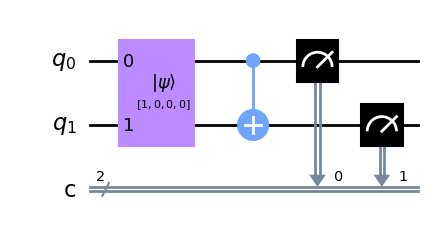

In [1]:
from qiskit import QuantumCircuit,execute
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2,2)
# q0-q1: 0-0
sv = Statevector.from_label('00')
qc.initialize(sv,range(2))
qc.cx(0,1)
qc.measure(range(2),range(2))
qc.draw('mpl')

Total Assembly Time - 0.17881 (ms)
Total Assembly Time - 0.27299 (ms)
Total Assembly Time - 0.08988 (ms)
Total Assembly Time - 0.64993 (ms)
Total Assembly Time - 0.10395 (ms)
Total Assembly Time - 0.12493 (ms)
Total Assembly Time - 0.07296 (ms)
Total Assembly Time - 0.06604 (ms)
Total Assembly Time - 0.19908 (ms)
Total Assembly Time - 0.07415 (ms)
Total Assembly Time - 0.08392 (ms)
Pass: ContainsInstruction - 0.00930 (ms)
Pass: UnitarySynthesis - 0.00191 (ms)
Pass: HighLevelSynthesis - 0.19789 (ms)
Pass: UnrollCustomDefinitions - 0.11301 (ms)
Begin BasisTranslator from source basis {('initialize', 2), ('measure', 1), ('cx', 2)} to target basis {'set_density_matrix', 'rzx', 'sx', 'set_stabilizer', 'save_matrix_product_state', 'mcrz', 'set_superop', 'reset', 'save_expval', 'save_statevector_dict', 'set_unitary', 'x', 'u2', 'mcu1', 'rz', 'sdg', 'mcphase', 'cu1', 'z', 'mcp', 'mcz', 's', 'mcu2', 'mcrx', 'u', 'mcr', 'mcx_gray', 'mcu', 'kraus', 'cp', 'barrier', 'ecr', 'rx', 'save_superop', 'm

Counts: {'00': 1000}


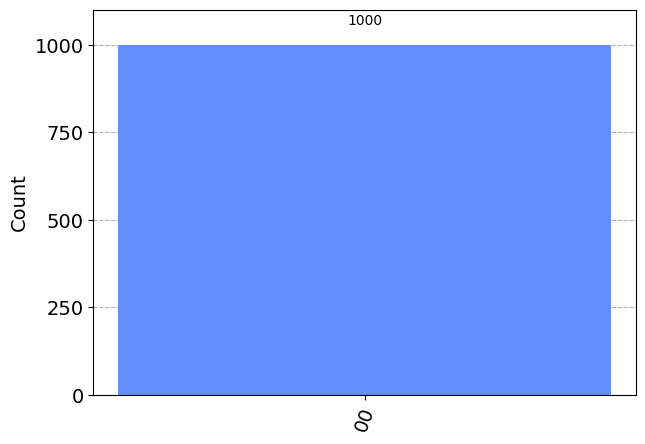

In [2]:
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

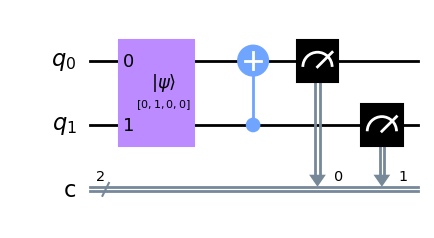

In [9]:
from qiskit import QuantumCircuit,execute
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2,2)
# q0-q1: 0-1
sv = Statevector.from_label('01')
qc.initialize(sv,range(2))
qc.cx(1,0)
qc.measure(range(2),range(2))
qc.draw('mpl')

Pass: ContainsInstruction - 0.01621 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.24223 (ms)
Pass: UnrollCustomDefinitions - 0.07105 (ms)
Begin BasisTranslator from source basis {('initialize', 2), ('measure', 1), ('cx', 2)} to target basis {'set_density_matrix', 'rzx', 'sx', 'set_stabilizer', 'save_matrix_product_state', 'mcrz', 'set_superop', 'reset', 'save_expval', 'save_statevector_dict', 'set_unitary', 'x', 'u2', 'mcu1', 'rz', 'sdg', 'mcphase', 'cu1', 'z', 'mcp', 'mcz', 's', 'mcu2', 'mcrx', 'u', 'mcr', 'mcx_gray', 'mcu', 'kraus', 'cp', 'barrier', 'ecr', 'rx', 'save_superop', 'mcsx', 'qerror_loc', 'for_loop', 'save_state', 'snapshot', 'save_unitary', 'save_density_matrix', 'measure', 'p', 'multiplexer', 'mcswap', 'id', 'save_amplitudes', 'save_probabilities', 'while_loop', 'tdg', 'r', 'cu', 'y', 'quantum_channel', 'save_expval_var', 'save_amplitudes_sq', 'roerror', 'rxx', 'pauli', 'cz', 'delay', 'rzz', 'save_statevector', 'cx', 'mcx', 'mcy', 'cswap', 'mcu3

Counts: {'01': 1000}


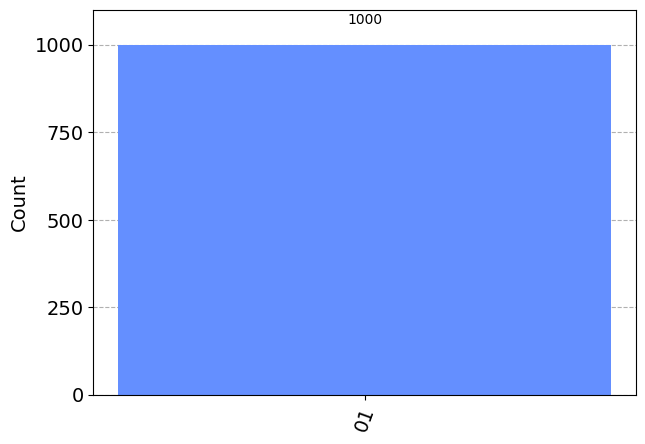

In [10]:
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

The result above shows that the measurement of outputs of circuit is 1000 `10`, $q_1q_0$ listed reversely, i.e. $|0,1>=(0,0,1,0)$.

Practice
---
try if set
```
sv = Statevector.from_label('10')
```
and explain the result.

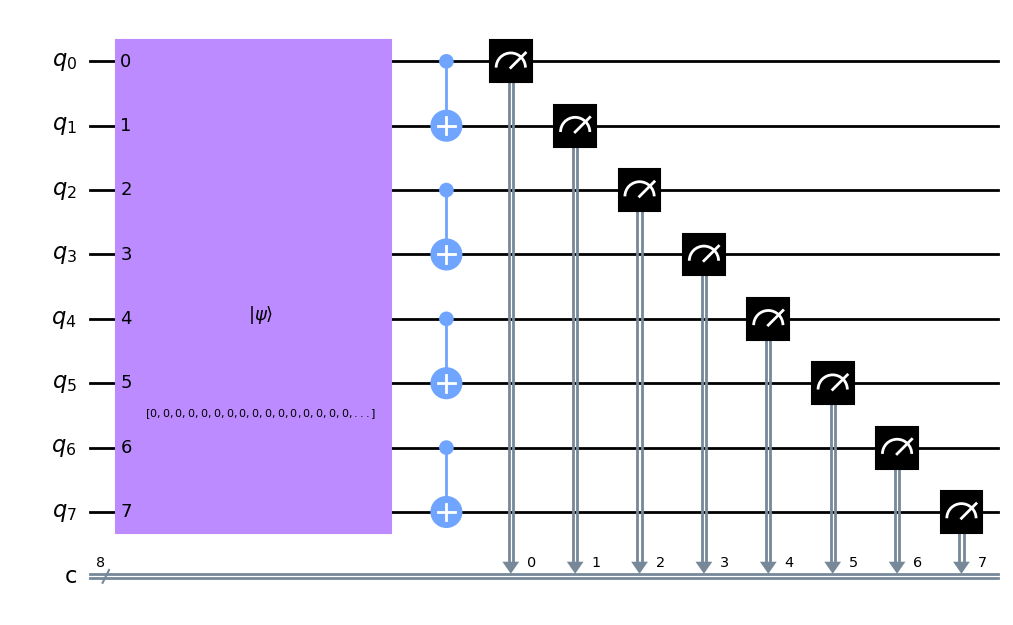

In [11]:
#Program 4.4a Appliy CX-gate to qubit
from qiskit import QuantumCircuit,execute
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(8,8)
sv = Statevector.from_label('11011000')
qc.initialize(sv,range(8))
qc.cx(0,1)
qc.cx(2,3)
qc.cx(4,5)
qc.cx(6,7)
qc.measure(range(8),range(8))
qc.draw('mpl')

Pass: ContainsInstruction - 0.01502 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.37694 (ms)
Pass: UnrollCustomDefinitions - 0.10228 (ms)
Begin BasisTranslator from source basis {('initialize', 8), ('measure', 1), ('cx', 2)} to target basis {'set_density_matrix', 'rzx', 'sx', 'set_stabilizer', 'save_matrix_product_state', 'mcrz', 'set_superop', 'reset', 'save_expval', 'save_statevector_dict', 'set_unitary', 'x', 'u2', 'mcu1', 'rz', 'sdg', 'mcphase', 'cu1', 'z', 'mcp', 'mcz', 's', 'mcu2', 'mcrx', 'u', 'mcr', 'mcx_gray', 'mcu', 'kraus', 'cp', 'barrier', 'ecr', 'rx', 'save_superop', 'mcsx', 'qerror_loc', 'for_loop', 'save_state', 'snapshot', 'save_unitary', 'save_density_matrix', 'measure', 'p', 'multiplexer', 'mcswap', 'id', 'save_amplitudes', 'save_probabilities', 'while_loop', 'tdg', 'r', 'cu', 'y', 'quantum_channel', 'save_expval_var', 'save_amplitudes_sq', 'roerror', 'rxx', 'pauli', 'cz', 'delay', 'rzz', 'save_statevector', 'cx', 'mcx', 'mcy', 'cswap', 'mcu3

Counts: {'01111000': 1000}


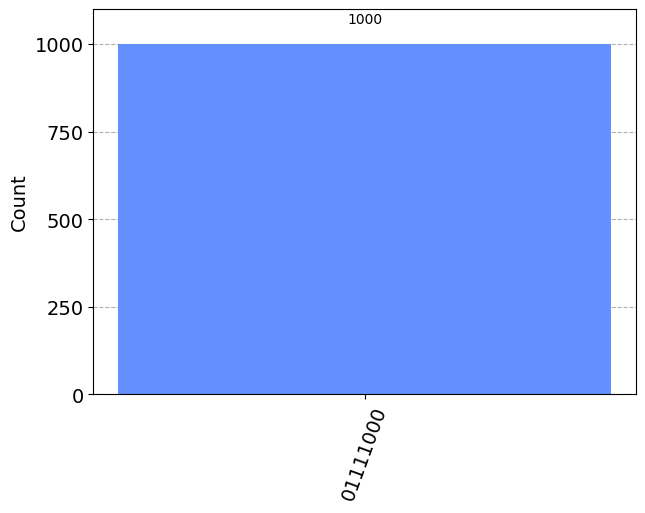

In [12]:
#Program 4.4b Measure state of qubit w/ CX-gate
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

`11011000` ➡︎ `11-01-10-00`: CNOT (HSB): `01-11-10-00` ➡︎ `01111000`

this comes from the result (MSB CNOT):
```
Input.    output
(q1,q0)   (q1,q0)
  00        00
  01        11
  10        10
  11        01
```  
`01111000` means: $q_0,q_1,\cdots,q_7$ is `0,0,0,1,1,1,1,0`.

Bell State
---
is a quantum entanglement by Hadamard gate + CNOT gate, with LSB.

There are four states:
1. $q_1=|0>$ and $q_0=|0>$, the superposition is below:
$$ H|0>=\frac{1}{\sqrt2}
\begin{pmatrix}
1&1\\1&-1
\end{pmatrix}
\begin{pmatrix}
1\\0
\end{pmatrix}
=\begin{pmatrix}
\frac{1}{\sqrt2}\\\frac{1}{\sqrt2}
\end{pmatrix}
$$
Now take CNOT on it
$$
\text{CNOT}(H|0>\otimes|0>)=
\text{CNOT}\left(
\begin{pmatrix}
\frac{1}{\sqrt2}\\\frac{1}{\sqrt2}
\end{pmatrix}\otimes
\begin{pmatrix}
1\\0
\end{pmatrix}
\right)
=
\begin{bmatrix}
 1 & 0 & 0 & 0  \\
 0 & 1 & 0 & 0  \\
 0 & 0 & 0 & 1  \\
 0 & 0 & 1 & 0  \\
 \end{bmatrix}
  \begin{pmatrix}
\frac{1}{\sqrt2}\\0\\\frac{1}{\sqrt2}\\0
\end{pmatrix}=
 \begin{pmatrix}
\frac{1}{\sqrt2}\\0\\0\\\frac{1}{\sqrt2}
\end{pmatrix}=
\frac{1}{\sqrt2}\left(|00>+|11>\right)=|\Phi^+>
$$
2. $q_1=|0>$ and $q_0=|1>$, similar to above:
$$\text{CNOT}(H|0>\otimes|1>)=
\frac{1}{\sqrt2}\left(|01>+|10>\right)=|\Psi^+>
$$
3. $q_1=|1>$ and $q_0=|0>$, similar to above:
$$\text{CNOT}(H|1>\otimes|0>)=
\frac{1}{\sqrt2}\left(|00>-|11>\right)=|\Phi^->
$$
4. $q_1=|1>$ and $q_0=|1>$, similar to above:
$$\text{CNOT}(H|1>\otimes|1>)=
\frac{1}{\sqrt2}\left(|01>-|10>\right)=|\Psi^->
$$

Below is the Bell state (top: q0 for target; bottom: q1 for control):


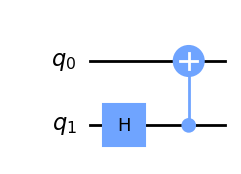

Below is the Bell state (top: q1 for control; bottom: q0 for traget):


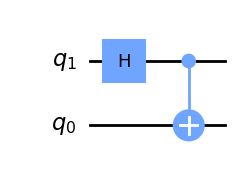

In [6]:
#Program 4.5 Build Bell state via H- and CX-gate
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
print("Below is the Bell state (top: q0 for target; bottom: q1 for control):")
display(qc.draw('mpl'))
print("Below is the Bell state (top: q1 for control; bottom: q0 for traget):")      
display(qc.draw('mpl',reverse_bits=True))

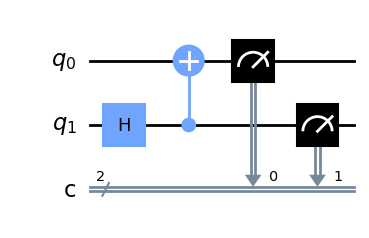

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.h(1)
qc.cx(1,0)
qc.measure(range(2),range(2))
qc.draw('mpl')

Total Assembly Time - 0.14210 (ms)
Total Assembly Time - 0.32592 (ms)
Total Assembly Time - 0.16499 (ms)
Total Assembly Time - 0.19288 (ms)
Total Assembly Time - 0.46182 (ms)
Total Assembly Time - 0.41294 (ms)
Total Assembly Time - 0.19979 (ms)
Total Assembly Time - 0.63515 (ms)
Total Assembly Time - 0.08583 (ms)
Total Assembly Time - 0.07415 (ms)
Total Assembly Time - 0.08512 (ms)
Pass: ContainsInstruction - 0.01383 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.23198 (ms)
Pass: UnrollCustomDefinitions - 0.37909 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('cx', 2), ('h', 1)} to target basis {'cy', 'mcx_gray', 'rz', 'mcrz', 'mcsx', 'set_stabilizer', 'set_unitary', 'kraus', 'reset', 'ry', 'y', 'u2', 'p', 'save_statevector', 'rxx', 'set_matrix_product_state', 'mcz', 'mcy', 'sx', 'save_statevector_dict', 'cp', 'sxdg', 'id', 'save_expval_var', 'if_else', 'delay', 'qerror_loc', 'barrier', 'u3', 'h', 'mcry', 'roerror', 'cz', 't', 'swap', 'save_stat

Counts: {'11': 516, '00': 484}


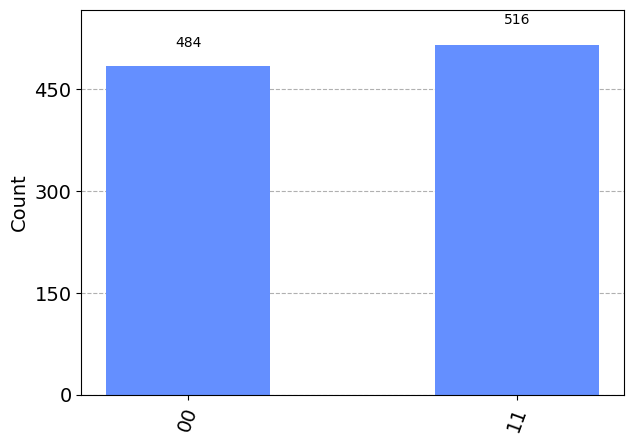

In [2]:
# Measure state of qubit in Bell state
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

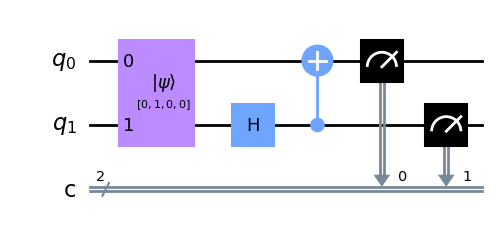

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2,2)
# q0=0 q1=1
sv = Statevector.from_label('01')
qc.initialize(sv,range(2))
qc.h(1)
qc.cx(1,0)
qc.measure(range(2),range(2))
qc.draw('mpl')

Pass: ContainsInstruction - 0.01621 (ms)
Pass: UnitarySynthesis - 0.00286 (ms)
Pass: HighLevelSynthesis - 0.28110 (ms)
Pass: UnrollCustomDefinitions - 0.07606 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('initialize', 2), ('cx', 2), ('h', 1)} to target basis {'cy', 'mcx_gray', 'rz', 'mcrz', 'mcsx', 'set_stabilizer', 'set_unitary', 'kraus', 'reset', 'ry', 'y', 'u2', 'p', 'save_statevector', 'rxx', 'set_matrix_product_state', 'mcz', 'mcy', 'sx', 'save_statevector_dict', 'cp', 'sxdg', 'id', 'save_expval_var', 'if_else', 'delay', 'qerror_loc', 'barrier', 'u3', 'h', 'mcry', 'roerror', 'cz', 't', 'swap', 'save_state', 'cu1', 'u', 'save_stabilizer', 'mcu2', 'mcp', 'save_clifford', 'save_superop', 'snapshot', 'sdg', 'rzx', 'mcu1', 'save_density_matrix', 'x', 'set_density_matrix', 'save_amplitudes', 'save_probabilities_dict', 'mcr', 'mcswap', 'set_statevector', 'csx', 'u1', 'rzz', 'quantum_channel', 'diagonal', 'cx', 'set_superop', 'superop', 'mcphase', 'r', 'cu3', 'save_unita

Counts: {'01': 488, '10': 512}


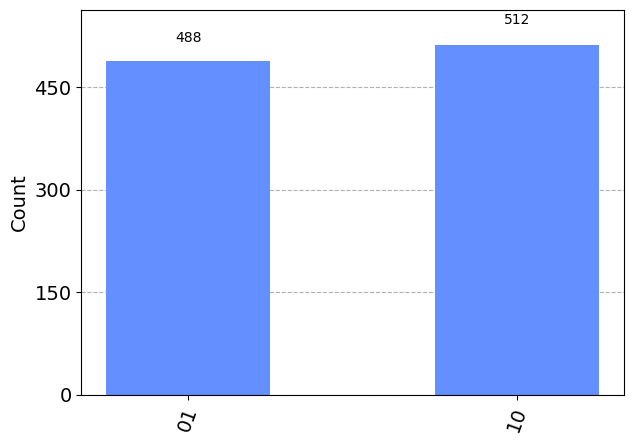

In [8]:
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

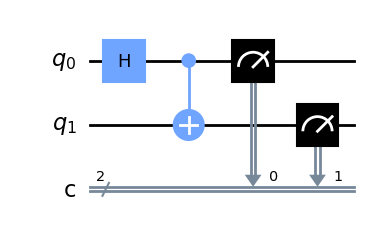

In [7]:
#Program 4.6a Build Bell state via H- and CX-gate
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(range(2),range(2))
qc.draw('mpl')

Pass: ContainsInstruction - 0.01597 (ms)
Pass: UnitarySynthesis - 0.00381 (ms)
Pass: HighLevelSynthesis - 0.24509 (ms)
Pass: UnrollCustomDefinitions - 0.08798 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('initialize', 2), ('cx', 2), ('h', 1)} to target basis {'cy', 'mcx_gray', 'rz', 'mcrz', 'mcsx', 'set_stabilizer', 'set_unitary', 'kraus', 'reset', 'ry', 'y', 'u2', 'p', 'save_statevector', 'rxx', 'set_matrix_product_state', 'mcz', 'mcy', 'sx', 'save_statevector_dict', 'cp', 'sxdg', 'id', 'save_expval_var', 'if_else', 'delay', 'qerror_loc', 'barrier', 'u3', 'h', 'mcry', 'roerror', 'cz', 't', 'swap', 'save_state', 'cu1', 'u', 'save_stabilizer', 'mcu2', 'mcp', 'save_clifford', 'save_superop', 'snapshot', 'sdg', 'rzx', 'mcu1', 'save_density_matrix', 'x', 'set_density_matrix', 'save_amplitudes', 'save_probabilities_dict', 'mcr', 'mcswap', 'set_statevector', 'csx', 'u1', 'rzz', 'quantum_channel', 'diagonal', 'cx', 'set_superop', 'superop', 'mcphase', 'r', 'cu3', 'save_unita

Counts: {'11': 498, '00': 502}


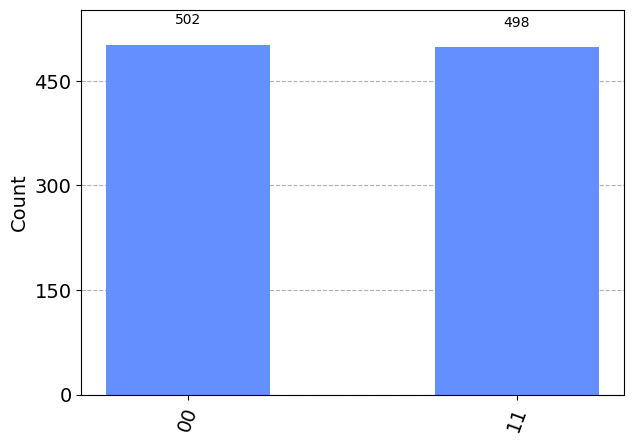

In [4]:
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Pass: ContainsInstruction - 0.00906 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.15497 (ms)
Pass: UnrollCustomDefinitions - 0.13375 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('cx', 2), ('h', 1)} to target basis {'sdg', 'mcx', 'cz', 'ecr', 'multiplexer', 'u3', 'snapshot', 'mcrx', 'quantum_channel', 'save_superop', 'cu1', 'reset', 'initialize', 'x', 'set_matrix_product_state', 'cu3', 'pauli', 'save_unitary', 'mcsx', 'rz', 'ryy', 'unitary', 'if_else', 'ry', 'sxdg', 'save_probabilities', 'cu', 'diagonal', 'measure', 'tdg', 's', 'cu2', 'cx', 'id', 'rx', 'u', 'cy', 'cswap', 'mcswap', 'roerror', 'mcy', 'save_expval_var', 'save_probabilities_dict', 'save_stabilizer', 'save_clifford', 'superop', 'y', 'sx', 'delay', 'mcu2', 'save_state', 'h', 'for_loop', 'z', 'mcu1', 'rxx', 'ccx', 'save_statevector_dict', 'mcu', 'save_statevector', 'mcrz', 'rzz', 'csx', 'save_density_matrix', 'mcphase', 'barrier', 'mcp', 'qerror_loc', 'set_superop', 'set_statevector

Counts: {'00': 505, '11': 495}


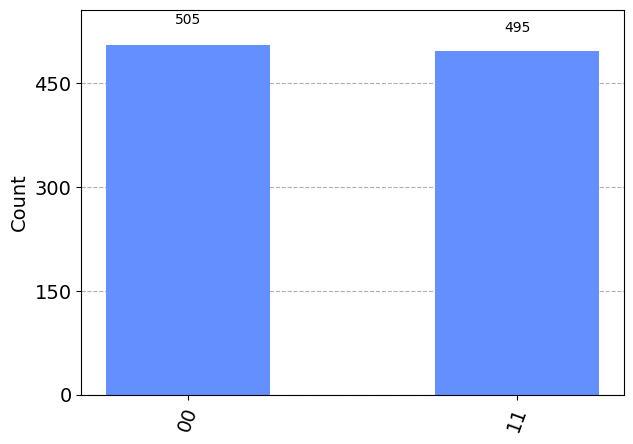

In [8]:
#Program 4.6b Measure state of qubit in Bell state
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

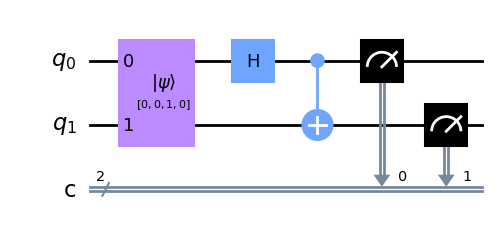

In [9]:
#Program 4.7a Iinitialize qubit and build Bell state via H- and CX-gate
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2,2)
sv = Statevector.from_label('10')
qc.initialize(sv,range(2))
qc.h(0)
qc.cx(0,1)
qc.measure(range(2),range(2))
qc.draw('mpl')

Pass: ContainsInstruction - 0.00715 (ms)
Pass: UnitarySynthesis - 0.00095 (ms)
Pass: HighLevelSynthesis - 0.18811 (ms)
Pass: UnrollCustomDefinitions - 0.06580 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('h', 1), ('cx', 2), ('initialize', 2)} to target basis {'sdg', 'mcx', 'cz', 'ecr', 'multiplexer', 'u3', 'snapshot', 'mcrx', 'quantum_channel', 'save_superop', 'cu1', 'reset', 'initialize', 'x', 'set_matrix_product_state', 'cu3', 'pauli', 'save_unitary', 'mcsx', 'rz', 'ryy', 'unitary', 'if_else', 'ry', 'sxdg', 'save_probabilities', 'cu', 'diagonal', 'measure', 'tdg', 's', 'cu2', 'cx', 'id', 'rx', 'u', 'cy', 'cswap', 'mcswap', 'roerror', 'mcy', 'save_expval_var', 'save_probabilities_dict', 'save_stabilizer', 'save_clifford', 'superop', 'y', 'sx', 'delay', 'mcu2', 'save_state', 'h', 'for_loop', 'z', 'mcu1', 'rxx', 'ccx', 'save_statevector_dict', 'mcu', 'save_statevector', 'mcrz', 'rzz', 'csx', 'save_density_matrix', 'mcphase', 'barrier', 'mcp', 'qerror_loc', 'set_superop

Counts: {'10': 481, '01': 519}


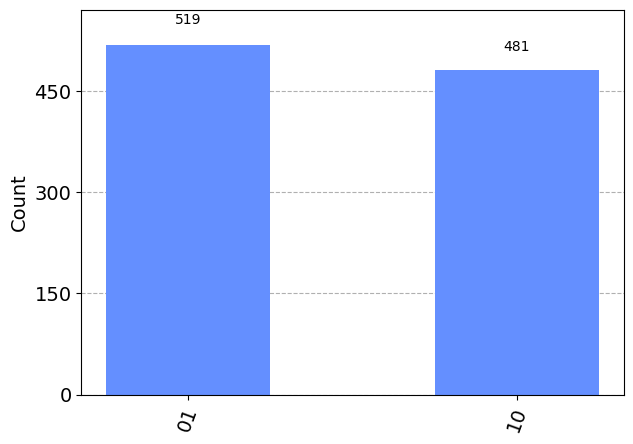

In [10]:
#Program 4.7b Measure state of qubit in Bell state
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

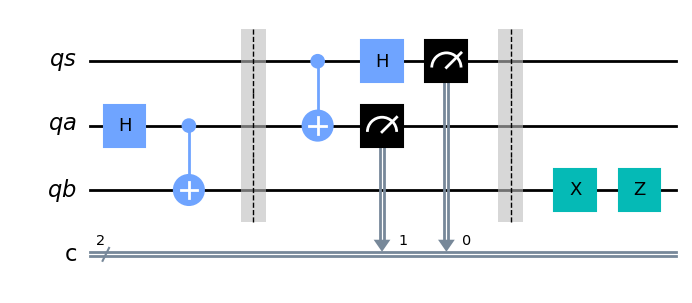

In [11]:
#Program 4.8 Show quantum circuit for quantum teleportation
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qs = QuantumRegister(1,'qs')
qa = QuantumRegister(1,'qa')
qb = QuantumRegister(1,'qb')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qs,qa,qb,cr)
qc.h(qa)
qc.cx(qa,qb)
qc.barrier()
qc.cx(qs,qa)
qc.h(qs)
qc.measure(qs,0)
qc.measure(qa,1)
qc.barrier()
qc.x(qb)
qc.z(qb)
qc.draw('mpl')

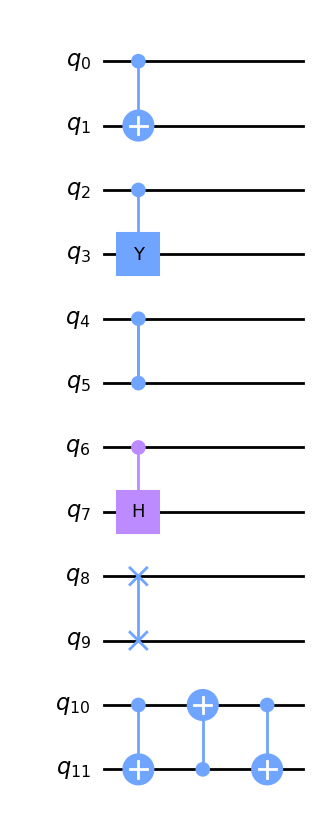

In [12]:
#Program 4.9 Apply CX-, CY-, CZ-, CH-, and SWAP-gate to qubit 
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
qc.cx(0,1)
qc.cy(2,3)
qc.cz(4,5)
qc.ch(6,7)
qc.swap(8,9)
qc.cx(10,11)
qc.cx(11,10)
qc.cx(10,11)
qc.draw('mpl')

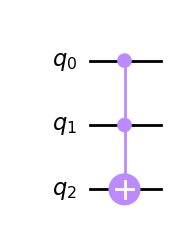

In [13]:
#Program 4.10 Apply CCX-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

Below is quantum circuit of CCNOT gate (MSB as target bit):


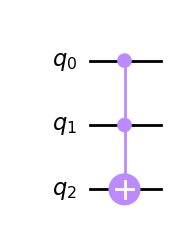

Total Assembly Time - 0.38505 (ms)


<IPython.core.display.Latex object>

Below is quantum circuit of CCNOT gate (LSB as target bit):


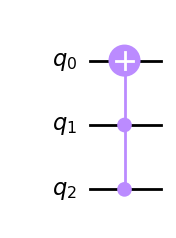

Total Assembly Time - 0.23174 (ms)


<IPython.core.display.Latex object>

In [14]:
#Program 4.11 Show unitary matrix of CCX-gate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('aer_simulator')
qc1 = QuantumCircuit(3)
qc1.ccx(0,1,2)
print("="*70,"\nBelow is quantum circuit of CCNOT gate (MSB as target bit):")
display(qc1.draw('mpl'))
qc1.save_unitary()
unitary = sim.run(qc1).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CCNOT (MSB as target bit) = }\n"))
qc2 = QuantumCircuit(3)
qc2.ccx(2,1,0)
print("="*70,"\nBelow is quantum circuit of CCNOT gate (LSB as target bit):")
display(qc2.draw('mpl'))
qc2.save_unitary()
unitary = sim.run(qc2).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CCNOT (LSB as target bit) = }\n"))

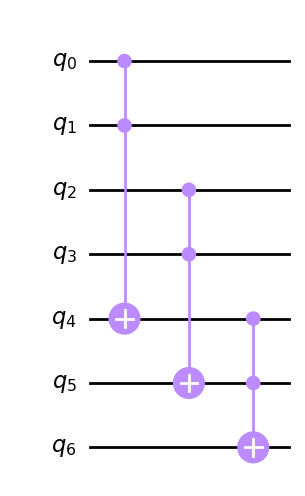

In [15]:
#Program 4.12 Apply CCCCX-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(7)
qc.ccx(0,1,4)
qc.ccx(2,3,5)
qc.ccx(4,5,6)
qc.draw('mpl')